# FORECASTING SPORTS POPULARITY USING TIME SERIES ANALYSIS

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
sm.__version__

'0.12.2'

In [3]:
df_ipl = pd.read_csv('ipl.csv')
df_nfl = pd.read_csv('nfl.csv')

In [4]:
df_ipl.head()
df_nfl.head()

,Month,nfl: (United States)
0,2007-02,9
1,2007-03,8
2,2007-04,12
3,2007-05,5
4,2007-06,4


In [5]:
df_ipl.columns=["Month","Frequency"]
df_nfl.columns=["Month","Frequency"]
df_ipl.head()
df_nfl.head()

,Month,Frequency
0,2007-02,9
1,2007-03,8
2,2007-04,12
3,2007-05,5
4,2007-06,4


In [6]:
df_ipl['Month']=pd.to_datetime(df_ipl['Month'])
df_nfl['Month']=pd.to_datetime(df_nfl['Month'])

In [7]:
df_ipl.set_index('Month',inplace=True)
df_nfl.set_index('Month',inplace=True)

In [8]:
df_ipl.head()
df_nfl.head()

,Frequency
Month,
2007-02-01,9
2007-03-01,8
2007-04-01,12
2007-05-01,5
2007-06-01,4


In [9]:
df_ipl.describe()

,Frequency
count,180
unique,29
top,<1
freq,77


In [10]:
df_nfl.describe()

,Frequency
count,180.000000
mean,22.400000
std,18.376448
min,3.000000
25%,7.750000
50%,17.000000
75%,34.250000
max,100.000000


In [11]:
df_ipl['Frequency'].replace('<1',0,inplace=True)
df_nfl['Frequency'].replace('<1',0,inplace=True)
df_ipl['Frequency']=df_ipl['Frequency'].astype('int')
df_nfl['Frequency']=df_nfl['Frequency'].astype('int')

In [12]:
df_ipl.info

<bound method DataFrame.info of             Frequency
Month                
2007-11-01          0
2007-12-01          0
2008-01-01          0
2008-02-01          1
2008-03-01          1
...               ...
2022-06-01          2
2022-07-01          1
2022-08-01          1
2022-09-01          1
2022-10-01          1

[180 rows x 1 columns]>

In [13]:
df_nfl.info

<bound method DataFrame.info of             Frequency
Month                
2007-02-01          9
2007-03-01          8
2007-04-01         12
2007-05-01          5
2007-06-01          4
...               ...
2021-09-01         52
2021-10-01         58
2021-11-01         57
2021-12-01         62
2022-01-01        100

[180 rows x 1 columns]>

In [14]:
df_ipl.describe()

,Frequency
count,180.000000
mean,6.327778
std,15.364412
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,100.000000


In [15]:
df_nfl.describe()

,Frequency
count,180.000000
mean,22.400000
std,18.376448
min,3.000000
25%,7.750000
50%,17.000000
75%,34.250000
max,100.000000


<AxesSubplot:xlabel='Month'>

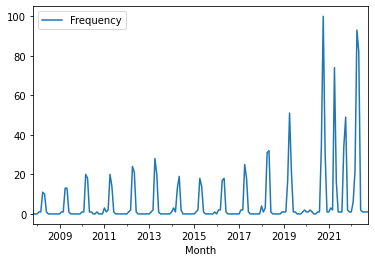

In [16]:
df_ipl.plot()

<AxesSubplot:xlabel='Month'>

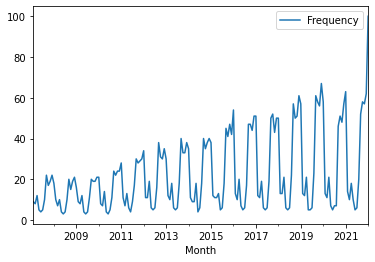

In [17]:
df_nfl.plot()

Applying the Augmented Dickey Fuller test to check for stationarity in a time series by using Python's inbuilt statsmodels.tsa.stattools library. Defining a function to test the time series for stationarity using the imported adf function and printing a proper report of the same.

In [18]:
from statsmodels.tsa.stattools import adfuller

In [20]:
def adfuller_test(trends):
    result = adfuller(trends)
    labels = ['ADF Test Statistic','p-value','#Lags Used','#Observation Used']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')
        

In [21]:
adfuller_test(df_ipl['Frequency'])

ADF Test Statistic: -1.6036741773756555
p-value: 0.4817475652285785
#Lags Used: 12
#Observation Used: 167
week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.


In [22]:
adfuller_test(df_nfl['Frequency'])

ADF Test Statistic: 0.09592464075860353
p-value: 0.9657817464169767
#Lags Used: 14
#Observation Used: 165
week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.


### Using differencing to transform a non-stationary time series into a stationary time series. Performing first round of differencing...

In [23]:
df_ipl['Frequency First Difference'] = df_ipl['Frequency'] - df_ipl['Frequency'].shift(1)
df_nfl['Frequency First Difference'] = df_nfl['Frequency'] - df_nfl['Frequency'].shift(1)

In [24]:
df_ipl['Frequency'].shift(1).head()

Month
2007-11-01    NaN
2007-12-01    0.0
2008-01-01    0.0
2008-02-01    0.0
2008-03-01    1.0
Name: Frequency, dtype: float64

In [25]:
df_nfl['Frequency'].shift(1).head()

Month
2007-02-01     NaN
2007-03-01     9.0
2007-04-01     8.0
2007-05-01    12.0
2007-06-01     5.0
Name: Frequency, dtype: float64

### Performing first round of seasonal differencing...

In [26]:
df_ipl['Seasonal First Difference']=df_ipl['Frequency']-df_ipl['Frequency'].shift(12)
df_nfl['Seasonal First Difference']=df_nfl['Frequency']-df_nfl['Frequency'].shift(12)

In [27]:
df_ipl.head(15)

,Frequency,Frequency First Difference,Seasonal First Difference
Month,,,
2007-11-01,0,NaN,NaN
2007-12-01,0,0.0,NaN
2008-01-01,0,0.0,NaN
2008-02-01,1,1.0,NaN
2008-03-01,1,0.0,NaN
2008-04-01,11,10.0,NaN
2008-05-01,10,-1.0,NaN
2008-06-01,1,-9.0,NaN
2008-07-01,0,-1.0,NaN


In [28]:
df_nfl.head(15)

,Frequency,Frequency First Difference,Seasonal First Difference
Month,,,
2007-02-01,9,NaN,NaN
2007-03-01,8,-1.0,NaN
2007-04-01,12,4.0,NaN
2007-05-01,5,-7.0,NaN
2007-06-01,4,-1.0,NaN
2007-07-01,5,1.0,NaN
2007-08-01,10,5.0,NaN
2007-09-01,22,12.0,NaN
2007-10-01,17,-5.0,NaN


Using the adf test on the newly differenced data to check for stationarity. dropna() used to remove the NA values that represent the loss of data points that occurs because of transformation of time series (via differencing or logarithmic transformation).

In [29]:
adfuller_test(df_ipl['Seasonal First Difference'].dropna())

ADF Test Statistic: -3.370336285533319
p-value: 0.012012641067597925
#Lags Used: 14
#Observation Used: 153
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


In [30]:
adfuller_test(df_nfl['Seasonal First Difference'].dropna())

ADF Test Statistic: -2.8408978363046553
p-value: 0.05266509893269664
#Lags Used: 2
#Observation Used: 165
week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.


Performing second round of differencing on the nfl dataset to make the time series stationary.

In [31]:
df_nfl['Frequency Second Difference'] = df_nfl['Frequency First Difference'] - df_nfl['Frequency First Difference'].shift(1)
df_nfl['Frequency First Difference'].shift(1).head()

Month
2007-02-01    NaN
2007-03-01    NaN
2007-04-01   -1.0
2007-05-01    4.0
2007-06-01   -7.0
Name: Frequency First Difference, dtype: float64

In [32]:
df_nfl['Seasonal Second Difference']=df_nfl['Frequency First Difference']-df_nfl['Frequency First Difference'].shift(12)
df_nfl.head(15)

,Frequency,Frequency First Difference,Seasonal First Difference,Frequency Second Difference,Seasonal Second Difference
Month,,,,,
2007-02-01,9,NaN,NaN,NaN,NaN
2007-03-01,8,-1.0,NaN,NaN,NaN
2007-04-01,12,4.0,NaN,5.0,NaN
2007-05-01,5,-7.0,NaN,-11.0,NaN
2007-06-01,4,-1.0,NaN,6.0,NaN
2007-07-01,5,1.0,NaN,2.0,NaN
2007-08-01,10,5.0,NaN,4.0,NaN
2007-09-01,22,12.0,NaN,7.0,NaN
2007-10-01,17,-5.0,NaN,-17.0,NaN


In [33]:
adfuller_test(df_nfl['Seasonal Second Difference'].dropna())

ADF Test Statistic: -13.327032773477724
p-value: 6.2914497057135e-25
#Lags Used: 1
#Observation Used: 165
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


### Plotting all the differenced time series data for both the datasets.

<AxesSubplot:xlabel='Month'>

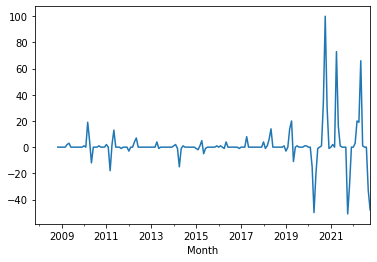

In [34]:
df_ipl['Seasonal First Difference'].plot()

<AxesSubplot:xlabel='Month'>

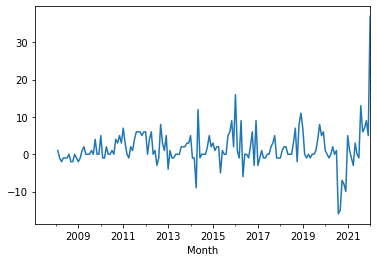

In [36]:
df_nfl['Seasonal First Difference'].plot()

<AxesSubplot:xlabel='Month'>

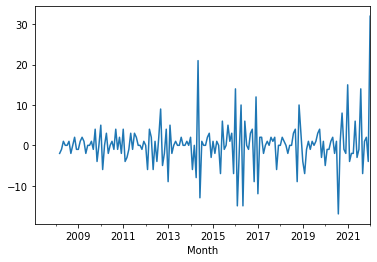

In [35]:
df_nfl['Seasonal Second Difference'].plot()

### Plotting the autocorrelation plot of both the time series using inbuilt autocorrelation plot of pandas library.

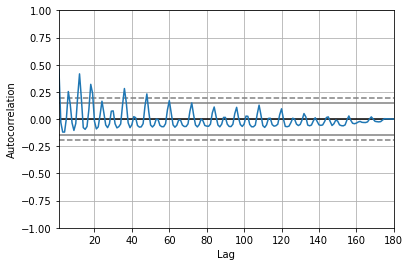

In [37]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_ipl['Frequency'])
plt.show()


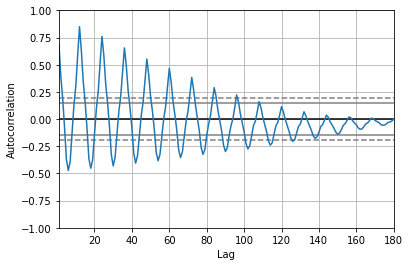

In [38]:
autocorrelation_plot(df_nfl['Frequency'])
plt.show()

### Plotting the ACF and PACF graphs for the IPL and NFL datasets using the statsmodels library.

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

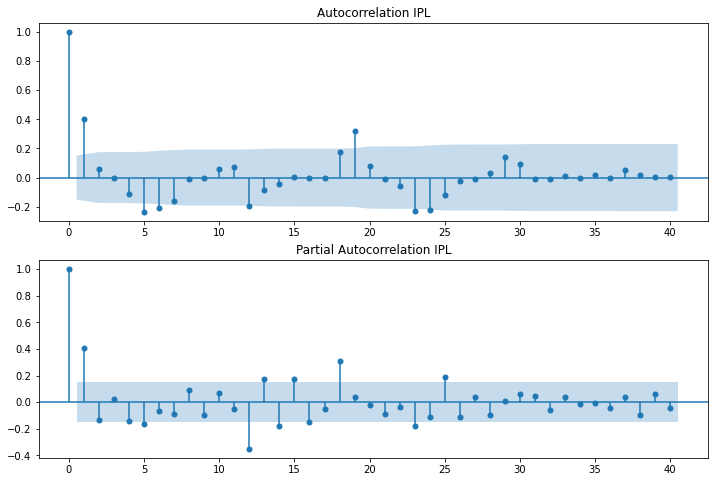

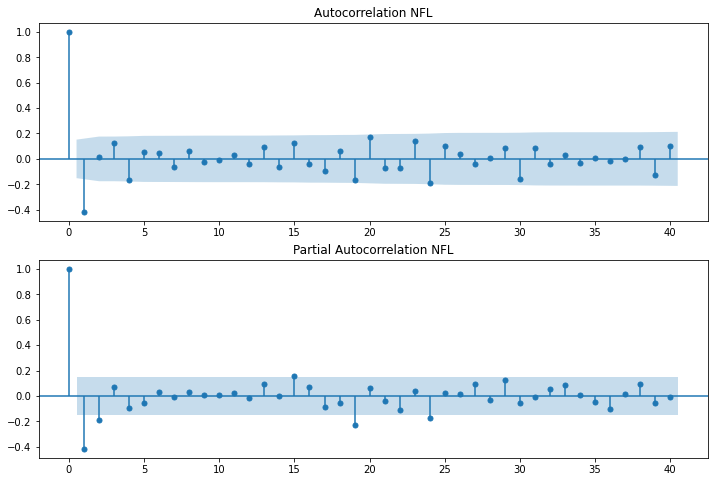

In [40]:
fig1 = plt.figure(figsize=(12,8))
fig2 = plt.figure(figsize=(12,8))
ax1 = fig1.add_subplot(211)
fig1 = sm.graphics.tsaplots.plot_acf(df_ipl['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1,title='Autocorrelation IPL')
ax2 = fig1.add_subplot(212)
fig1 = sm.graphics.tsaplots.plot_pacf(df_ipl['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2,title='Partial Autocorrelation IPL')
ax3 = fig2.add_subplot(211)
fig2 = sm.graphics.tsaplots.plot_acf(df_nfl['Seasonal Second Difference'].iloc[13:],lags=40,ax=ax3,title='Autocorrelation NFL')
ax4 = fig2.add_subplot(212)
fig2 = sm.graphics.tsaplots.plot_pacf(df_nfl['Seasonal Second Difference'].iloc[13:],lags=40,ax=ax4,title='Partial Autocorrelation NFL')

* ACF and PACF plots are used to estimate the order of our model. ACF plot gives the order for the MA model called order q. PACF plot gives the order for the AR model called order p.

* For our IPL dataset, as we can observe from the ACF and PACF plots, the order p=3 and the order q=3. This implies that we can observe spikes in the plot at three lag values. 

* Similarly, for our NFL dataset, we can observe from its ACF and PACF plots, that the order p=2 and the order q=1. This implies that the PACF plot spikes at two lag values and the ACF plot spikes at one lag value. 

* We use these orders to fit our ARIMA and SARIMA models on both the datasets. ARIMA(p,d,q) where p is the order we get from the PACF plot, q is the order we get from the ACF plot and d represents the order of differencing. Since our initial dataset was non-stationary in nature, we have used d=1 for our models. 

* After trying multiple combinations of orders p and q, we have chosen the below orders as their models have the lowest AIC values.

* AIC or Akaike's Information Criteria is a statistical criteria used to compare the quality of different statistical models. 

* SARIMA (p,d,q,s) model is similar to the ARIMA (p,d,q) model with the notable addition of the seasonality (s) parameter. Since our dataset is a monthly time series with seasonality present in it we have set s=12. We have used the statsmodels library for ARIMA and SARIMA modelling.



### ARIMA Models:

In [41]:
from statsmodels.tsa.arima.model import ARIMA
model_A = ARIMA(df_ipl['Frequency'],order=(3,1,3))
model_fit_A = model_A.fit()
model_fit_A.summary()

C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Frequency   No. Observations:                  180
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -706.669
Date:                Fri, 22 Dec 2023   AIC                           1427.337
Time:                        21:00:07   BIC                           1449.649
Sample:                    11-01-2007   HQIC                          1436.384
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9423      0.414      2.277      0.023       0.131       1.753
ar.L2         -0.2598      0.511     -0.508      0.611      -1.261       0.742
ar.L3         -0.0277      0.264     -0.105      0.916      -0.545       0.490
ma.L1         -1.3981      0.403     -3.471      0.001      -2.188      -0.609
ma.L2          0.0476      0.688      0.069      0.945      -1.300       1.395
ma.L3          0.3845      0.305      1.260      0.208      -0.214       0.982
sigma2       155.1515      7.367     21.059      0.000     140.712     169.591
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2211.43
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):              17.07   Skew:                             3.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

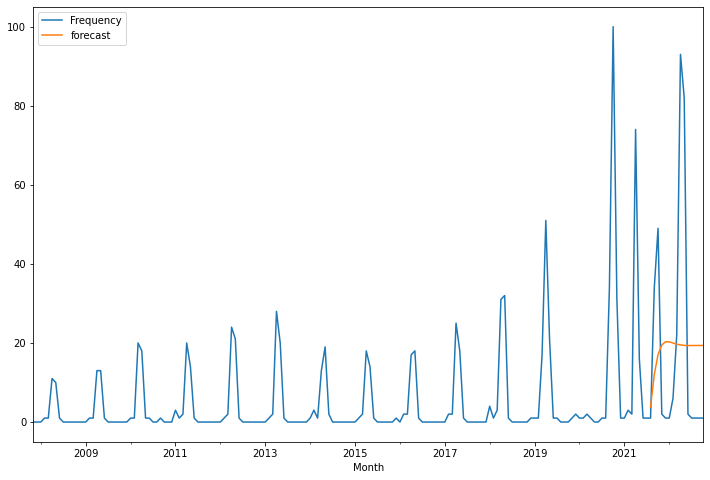

In [69]:
df_ipl['forecast']=model_fit_A.predict(start=165,end=200,dynamic=True)
df_ipl[['Frequency','forecast']].plot(figsize=(12,8))

In [42]:
model_B = ARIMA(df_nfl['Frequency'],order=(2,1,1))
model_fit_B = model_B.fit()
model_fit_B.summary()

C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Frequency   No. Observations:                  180
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -712.962
Date:                Fri, 22 Dec 2023   AIC                           1433.923
Time:                        21:00:44   BIC                           1446.673
Sample:                    02-01-2007   HQIC                          1439.093
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8834      0.147     -6.030      0.000      -1.171      -0.596
ar.L2          0.1147      0.121      0.945      0.344      -0.123       0.353
ma.L1          0.9886      0.101      9.780      0.000       0.791       1.187
sigma2       167.9642     22.330      7.522      0.000     124.198     211.730
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                65.72
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               7.21   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

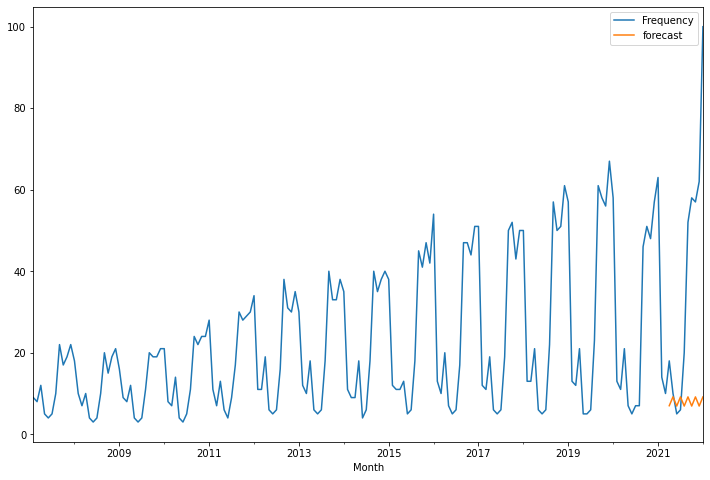

In [70]:
df_nfl['forecast']=model_fit_B.predict(start=170,end=200,dynamic=True)
df_nfl[['Frequency','forecast']].plot(figsize=(12,8))

### SARIMA Models:

In [45]:
model_ipl=sm.tsa.statespace.sarimax.SARIMAX(df_ipl['Frequency'],order=(3, 1, 3),seasonal_order=(3,1,3,12))
results_ipl=model_ipl.fit()

C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sar

<AxesSubplot:xlabel='Month'>

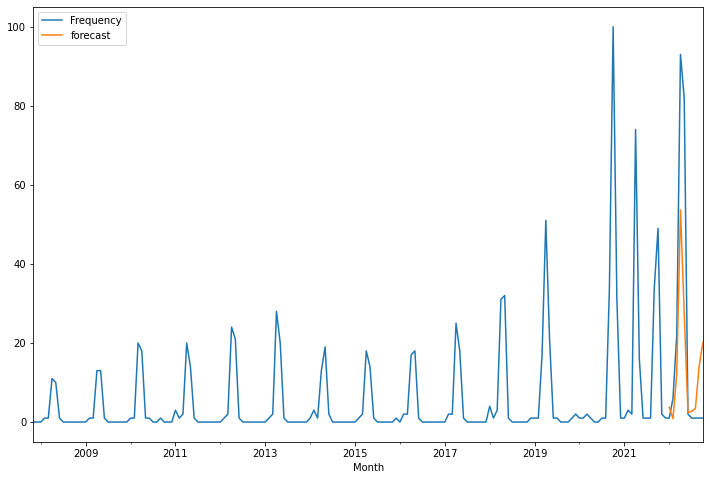

In [46]:
df_ipl['forecast']=results_ipl.predict(start=170,end=200,dynamic=True)
df_ipl[['Frequency','forecast']].plot(figsize=(12,8))

In [47]:
model_nfl=sm.tsa.statespace.sarimax.SARIMAX(df_nfl['Frequency'],order=(2, 1, 1),seasonal_order=(2,1,1,12))
results_nfl=model_nfl.fit()

C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

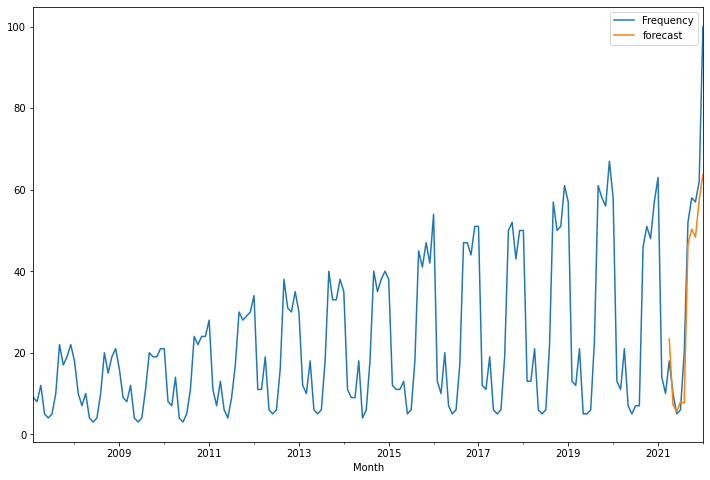

In [48]:
df_nfl['forecast']=results_nfl.predict(start=170,end=200,dynamic=True)
df_nfl[['Frequency','forecast']].plot(figsize=(12,8))

### Final results of the models used for forecasting and their summaries.

In [49]:
results_ipl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Frequency   No. Observations:                  180
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood                -635.933
Date:                            Fri, 22 Dec 2023   AIC                           1297.866
Time:                                    21:04:18   BIC                           1338.400
Sample:                                11-01-2007   HQIC                          1314.318
                                     - 10-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1372      0.078    -14.662      0.000      -1.289      -0.985
ar.L2         -0.2434      0.097     -2.518      0.012      -0.433      -0.054
ar.L3          0.2119      0.089      2.380      0.017       0.037       0.386
ma.L1          0.7486      8.488      0.088      0.930     -15.888      17.385
ma.L2         -0.7637     14.871     -0.051      0.959     -29.909      28.382
ma.L3         -0.9848      8.407     -0.117      0.907     -17.462      15.493
ar.S.L12      -0.9869      1.209     -0.816      0.414      -3.356       1.382
ar.S.L24      -0.6183      1.093     -0.566      0.572      -2.761       1.525
ar.S.L36      -0.4095      0.469     -0.873      0.382      -1.328       0.509
ma.S.L12       0.4147      1.223      0.339      0.735      -1.983       2.812
ma.S.L24      -0.2318      0.766     -0.303      0.762      -1.733       1.270
ma.S.L36      -0.0540      1.025     -0.053      0.958      -2.062       1.954
sigma2       104.2533    890.113      0.117      0.907   -1640.336    1848.843
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4277.59
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              20.44   Skew:                             3.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
results_nfl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Frequency   No. Observations:                  180
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -493.581
Date:                            Fri, 22 Dec 2023   AIC                           1001.162
Time:                                    21:04:24   BIC                           1022.988
Sample:                                02-01-2007   HQIC                          1010.021
                                     - 01-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8529      0.292     -2.918      0.004      -1.426      -0.280
ar.L2         -0.3939      0.156     -2.530      0.011      -0.699      -0.089
ma.L1          0.2324      0.300      0.775      0.438      -0.355       0.820
ar.S.L12      -0.3339      0.657     -0.509      0.611      -1.621       0.953
ar.S.L24      -0.1670      0.119     -1.402      0.161      -0.401       0.067
ma.S.L12       0.3192      0.672      0.475      0.635      -0.998       1.637
sigma2        21.4561      1.397     15.361      0.000      18.719      24.194
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               713.21
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               5.90   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Time Series Analysis performed on PepsiCo's stock returns data as they are the long standing sponsors of the leagues to check for fluctuations dependent on the seasonality of the sports leagues' playing seasons. Same modelling techniques used as above.

In [51]:
df_pepsi = pd.read_csv('pepsico.csv')
df_pepsi.head()

,Date,Returns
0,01-12-2007,-1.658458
1,01-01-2008,-10.342554
2,01-02-2008,2.218949
3,01-03-2008,3.795283
4,01-04-2008,-5.083100


In [52]:
df_pepsi.columns=["Month","Returns"]
df_pepsi.head()

,Month,Returns
0,01-12-2007,-1.658458
1,01-01-2008,-10.342554
2,01-02-2008,2.218949
3,01-03-2008,3.795283
4,01-04-2008,-5.083100


In [53]:
df_pepsi['Month']=pd.to_datetime(df_pepsi['Month'])
df_pepsi.set_index('Month',inplace=True)
df_pepsi.head()

,Returns
Month,
2007-01-12,-1.658458
2008-01-01,-10.342554
2008-01-02,2.218949
2008-01-03,3.795283
2008-01-04,-5.083100


In [54]:
df_pepsi['Returns']=df_pepsi['Returns'].astype('int')
df_pepsi.head()

,Returns
Month,
2007-01-12,-1
2008-01-01,-10
2008-01-02,2
2008-01-03,3
2008-01-04,-5


In [55]:
df_pepsi.describe()

,Returns
count,178.000000
mean,0.443820
std,3.998544
min,-20.000000
25%,-1.000000
50%,0.000000
75%,3.000000
max,10.000000


In [57]:
df_pepsi.info

<bound method DataFrame.info of             Returns
Month              
2007-01-12       -1
2008-01-01      -10
2008-01-02        2
2008-01-03        3
2008-01-04       -5
...             ...
2022-01-05       -2
2022-01-06        0
2022-01-07        4
2022-01-08       -1
2022-01-09       -5

[178 rows x 1 columns]>

<AxesSubplot:xlabel='Month'>

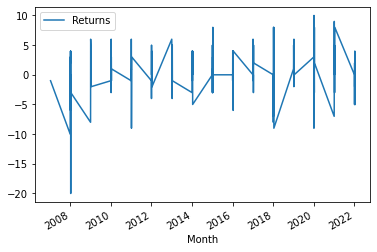

In [58]:
df_pepsi.plot()

In [59]:
def adfuller_test(returns):
    result = adfuller(returns)
    labels = ['ADF Test Statistic','p-value','#Lags Used','#Observation Used']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')

In [60]:
adfuller_test(df_pepsi['Returns'])

ADF Test Statistic: -11.418723699611535
p-value: 6.958187857783924e-21
#Lags Used: 1
#Observation Used: 176
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


### The data is stationary

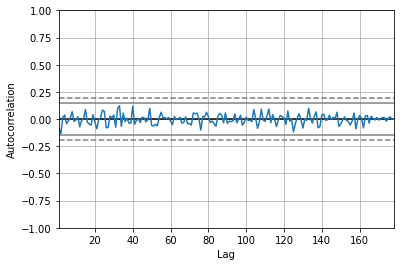

In [61]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_pepsi['Returns'])
plt.show()

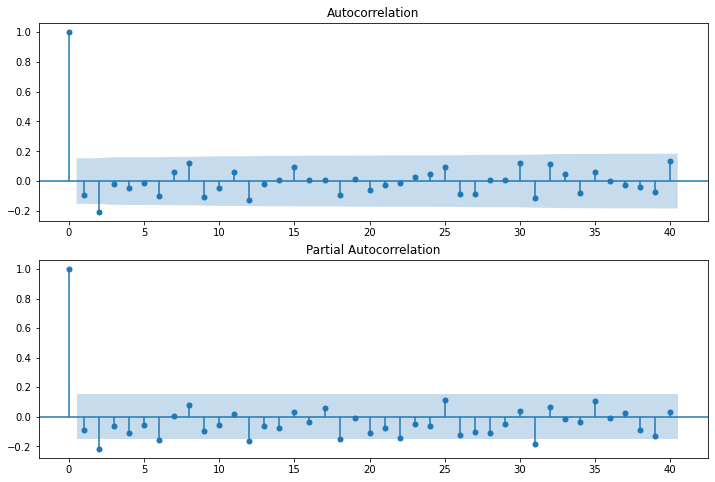

In [62]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(df_pepsi['Returns'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(df_pepsi['Returns'].iloc[13:],lags=40,ax=ax2)

### ARIMA:

In [63]:
from statsmodels.tsa.arima.model import ARIMA
model_C = ARIMA(df_pepsi['Returns'],order=(2,0,1))
model_fit_C = model_C.fit()
model_fit_C.summary()

C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Returns   No. Observations:                  178
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -496.200
Date:                Fri, 22 Dec 2023   AIC                           1002.400
Time:                        21:08:34   BIC                           1018.309
Sample:                             0   HQIC                          1008.851
                                - 178                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4603      0.271      1.701      0.089      -0.070       0.991
ar.L1         -0.0170      0.420     -0.040      0.968      -0.841       0.807
ar.L2         -0.1422      0.079     -1.796      0.073      -0.297       0.013
ma.L1         -0.0833      0.412     -0.202      0.840      -0.892       0.725
sigma2        15.4421      1.238     12.476      0.000      13.016      17.868
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                99.48
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -1.00
Prob(H) (two-sided):                  0.66   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

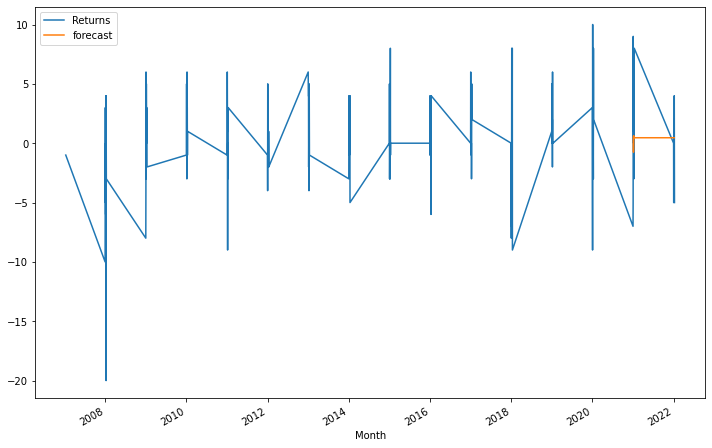

In [64]:
df_pepsi['forecast']=model_fit_C.predict(start=160,end=175,dynamic=True)
df_pepsi[['Returns','forecast']].plot(figsize=(12,8))

### SARIMA: 

In [66]:
model_pepsi=sm.tsa.statespace.sarimax.SARIMAX(df_pepsi['Returns'],order=(2, 0, 1),seasonal_order=(2,0,1,12))
results_pepsi=model_pepsi.fit()

C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\avant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<AxesSubplot:xlabel='Month'>

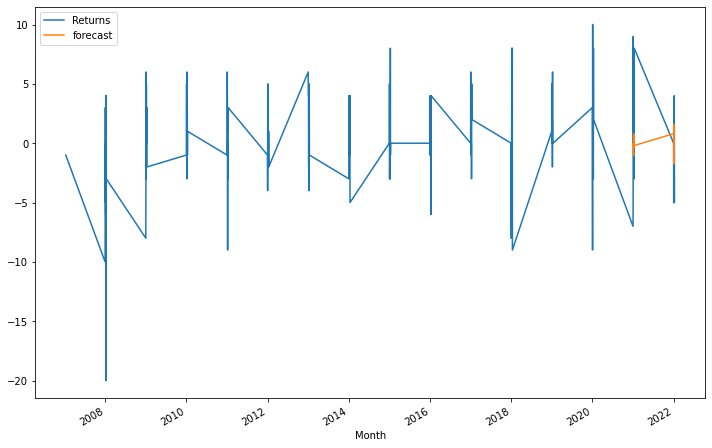

In [67]:
df_pepsi['forecast']=results_pepsi.predict(start=160,end=175,dynamic=True)
df_pepsi[['Returns','forecast']].plot(figsize=(12,8))

In [68]:
results_pepsi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Returns   No. Observations:                  178
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 12)   Log Likelihood                -496.367
Date:                            Fri, 22 Dec 2023   AIC                           1006.733
Time:                                    21:09:29   BIC                           1029.006
Sample:                                         0   HQIC                          1015.766
                                            - 178                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1963      0.522     -0.376      0.707      -1.220       0.827
ar.L2         -0.1373      0.077     -1.779      0.075      -0.289       0.014
ma.L1          0.0983      0.518      0.190      0.850      -0.917       1.113
ar.S.L12       0.0279      0.713      0.039      0.969      -1.370       1.425
ar.S.L24       0.1560      0.091      1.707      0.088      -0.023       0.335
ma.S.L12      -0.0749      0.739     -0.101      0.919      -1.523       1.373
sigma2        15.4199      1.264     12.194      0.000      12.941      17.898
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               103.00
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.97
Prob(H) (two-sided):                  0.84   Kurtosis:                         6.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""